# Prediction on heart failure
Cardiovascular disease is the Top 1 killer in this world. However, early predictions can be made based on individual's living behaviour, diet and some body indexes. In this project, we will build a model to predict  heart failure.

  **Dataset was obtained from a clinical record dataset on Kaggle.**
  
  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
  
  The dataset consists of **12 clinical features** for predicting **the mortality of patients.**

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
import keras.optimizers

### Extract Transform Load
Load data into a dataframe. 
Check on size of dataset and types of each feature.

In [3]:
df = pd.read_csv('C:/Users/Chan/Desktop/heart_failure_clinical_records_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.shape

(299, 13)

### Feature Creation

Data clesnsing and feature engineering

In [6]:
#Show all columns.

df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
#Rename column

df.rename(columns={'DEATH_EVENT': 'death_event'},inplace = True)

In [8]:
# Remove missing values

df.dropna(axis=0)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [9]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


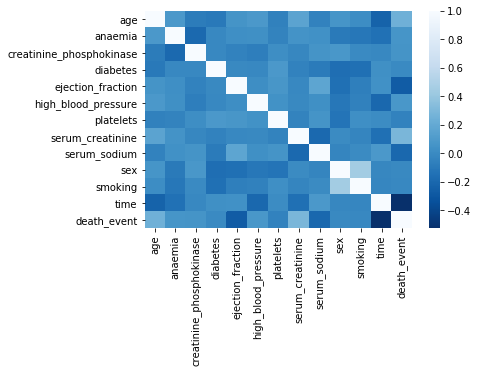

In [10]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, cmap="Blues_r")
plt.show()

**From the correlation table, we can find that all features are somehow correlated to the death event. So, all clinical features will be included in the model training.**

In [11]:
#Split data to X = independent variables and y = target

X = df.drop(columns=('death_event'),axis=1)
y = df.death_event

In [12]:
# Scale
scale = MinMaxScaler()
X= scale.fit_transform(X)

In [13]:
#Split the dataset, 85% for training, 15% for testing

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((254, 12), (45, 12), (254,), (45,))

### Random Forest Classifier

In [14]:
model = RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=0)

In [15]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [16]:
print('Accuracy-Score: {:.3f}'.format(accuracy_score(y_test, model.predict(X_test))))
print('F1-Score: {:.3f}'.format(f1_score(y_test, model.predict(X_test))))

Accuracy-Score: 0.911
F1-Score: 0.800


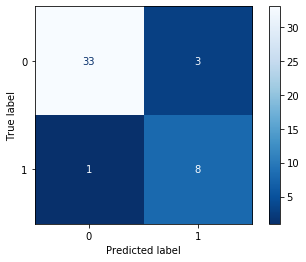

In [17]:
plot_confusion_matrix(model, X_test, y_test, cmap="Blues_r")
plt.show()

### Cat Boost Classifier

In [18]:
model1 = CatBoostClassifier(n_estimators=50, random_state=0)
model1.fit(X_train , y_train)

Learning rate set to 0.089504
0:	learn: 0.6720549	total: 134ms	remaining: 6.58s
1:	learn: 0.6459998	total: 136ms	remaining: 3.26s
2:	learn: 0.6228712	total: 137ms	remaining: 2.15s
3:	learn: 0.6028374	total: 139ms	remaining: 1.6s
4:	learn: 0.5777210	total: 141ms	remaining: 1.27s
5:	learn: 0.5577173	total: 142ms	remaining: 1.04s
6:	learn: 0.5405093	total: 144ms	remaining: 883ms
7:	learn: 0.5229435	total: 146ms	remaining: 764ms
8:	learn: 0.5076326	total: 147ms	remaining: 671ms
9:	learn: 0.4916688	total: 149ms	remaining: 596ms
10:	learn: 0.4792031	total: 151ms	remaining: 535ms
11:	learn: 0.4679567	total: 153ms	remaining: 484ms
12:	learn: 0.4593540	total: 154ms	remaining: 439ms
13:	learn: 0.4485737	total: 156ms	remaining: 401ms
14:	learn: 0.4415963	total: 157ms	remaining: 367ms
15:	learn: 0.4292164	total: 159ms	remaining: 338ms
16:	learn: 0.4194282	total: 160ms	remaining: 312ms
17:	learn: 0.4141644	total: 162ms	remaining: 288ms
18:	learn: 0.4068289	total: 164ms	remaining: 267ms
19:	learn: 0

In [19]:
print('Accuracy-Score: {:.3f}'.format(accuracy_score(y_test, model1.predict(X_test))))
print('F1-Score: {:.3f}'.format(f1_score(y_test, model1.predict(X_test))))

Accuracy-Score: 0.867
F1-Score: 0.667


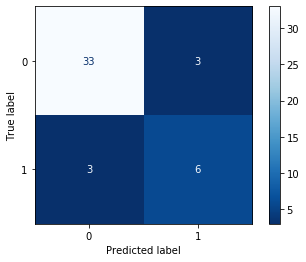

In [20]:
plot_confusion_matrix(model1, X_test, y_test, cmap="Blues_r")
plt.show()

### Feedforward Neural Network

In [21]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y,test_size=0.15, random_state=1)

In [22]:
model2 = Sequential()
model2.add(Dense(20,activation='relu',input_shape=(12,)))
model2.add(Dropout(0.1,seed=5))
model2.add(Dense(20,activation='relu'))
model2.add(Dropout(0.1,seed=5))
model2.add(Dense(1,activation='sigmoid'))

In [23]:
opt = keras.optimizers.adam(learning_rate=0.0005)

In [24]:
model2.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
model2.fit(X2_train,y2_train,batch_size=20,epochs=100,validation_data=(X2_test,y2_test))


Train on 254 samples, validate on 45 samples
Epoch 1/100
254/254 [==============================] - 0s 2ms/step - loss: 0.7184 - accuracy: 0.4291 - val_loss: 0.7133 - val_accuracy: 0.3778
Epoch 2/100
254/254 [==============================] - 0s 169us/step - loss: 0.6981 - accuracy: 0.4724 - val_loss: 0.6866 - val_accuracy: 0.5333
Epoch 3/100
254/254 [==============================] - 0s 153us/step - loss: 0.6860 - accuracy: 0.5433 - val_loss: 0.6633 - val_accuracy: 0.6222
Epoch 4/100
254/254 [==============================] - 0s 157us/step - loss: 0.6725 - accuracy: 0.5984 - val_loss: 0.6398 - val_accuracy: 0.7556
Epoch 5/100
254/254 [==============================] - 0s 185us/step - loss: 0.6665 - accuracy: 0.6181 - val_loss: 0.6183 - val_accuracy: 0.8000
Epoch 6/100
254/254 [==============================] - 0s 185us/step - loss: 0.6514 - accuracy: 0.6535 - val_loss: 0.5975 - val_accuracy: 0.8000
Epoch 7/100
254/254 [==============================] - 0s 165us/step - loss: 0.6518 - 

In [26]:
model2.evaluate(X2_test,y2_test)

45/45 [==============================] - 0s 111us/step


[0.3089365389611986, 0.9111111164093018]

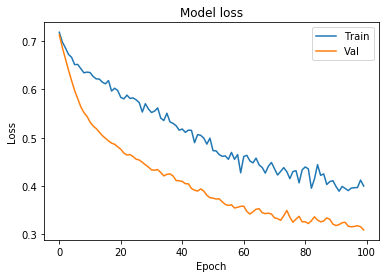

In [27]:
plt.plot(model2.history.history['loss'])
plt.plot(model2.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()